In [2]:
import torch
import numpy as np
from kmeans_pytorch import kmeans, kmeans_predict
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import sliding_window_view

# data
num_clusters = 5


if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

In [3]:
x = np.load("Dane/Learning_data/data/train_df_23_w20.npy")
data = torch.from_numpy(x.reshape(x.shape[0],x.shape[1]*x.shape[2] ))

In [4]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=data, num_clusters=num_clusters, distance='euclidean', device=torch.device('cuda:0')
)
cluster_ids_x = np.array(cluster_ids_x)

running k-means on cuda:0..


[running kmeans]: 69it [00:53,  1.30it/s, center_shift=0.000099, iteration=69, tol=0.000100] 


In [6]:
y = np.random.randn(5, 200) / 6
y = torch.from_numpy(y)

# predict cluster ids for y
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cuda:0..


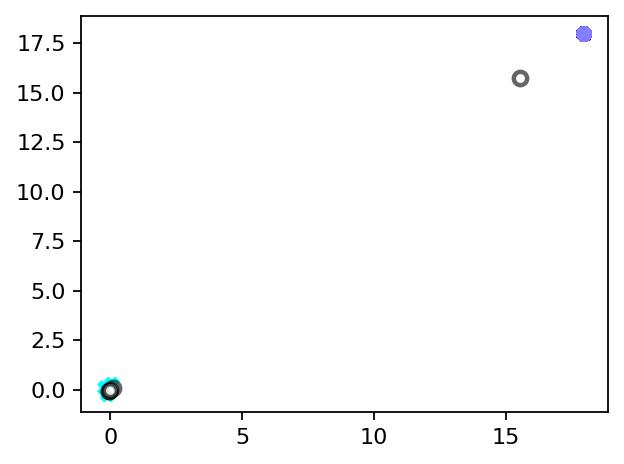

In [7]:
# plot
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0,0], x[:, 1,0], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
# plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()

In [11]:
data_test = np.load("Dane/Learning_data/data/train_test.npy")

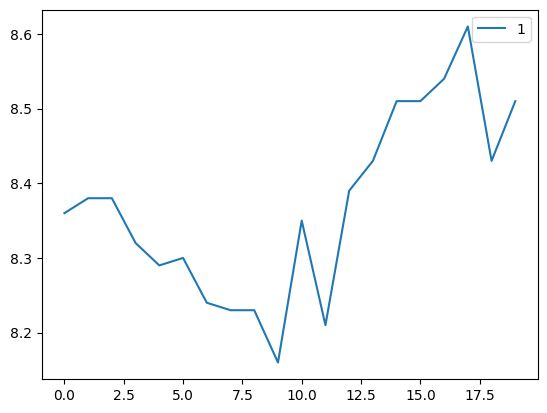

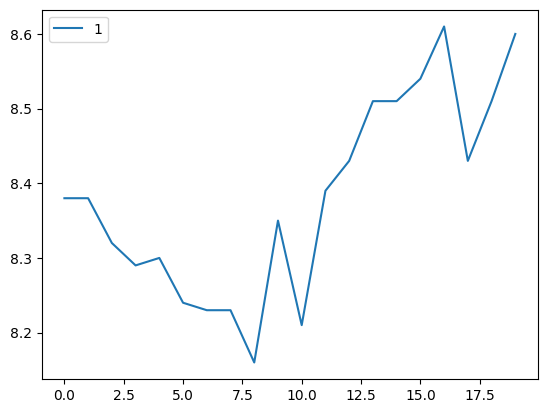

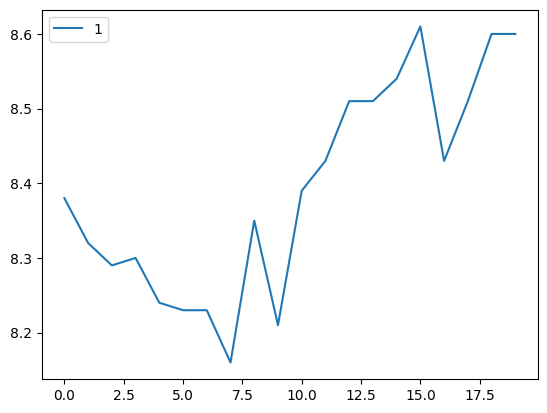

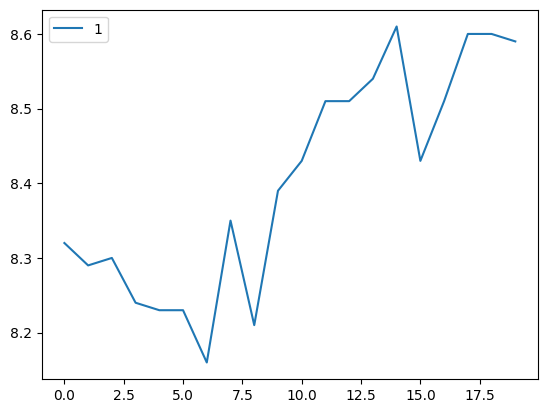

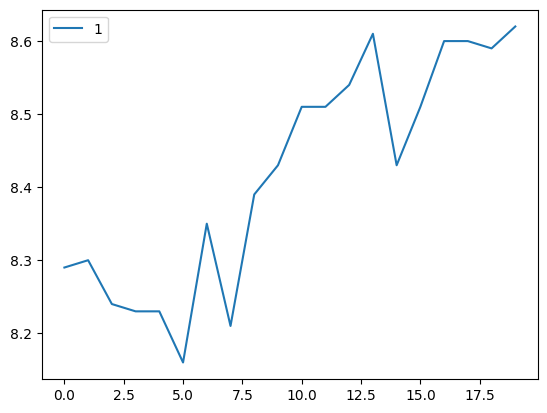

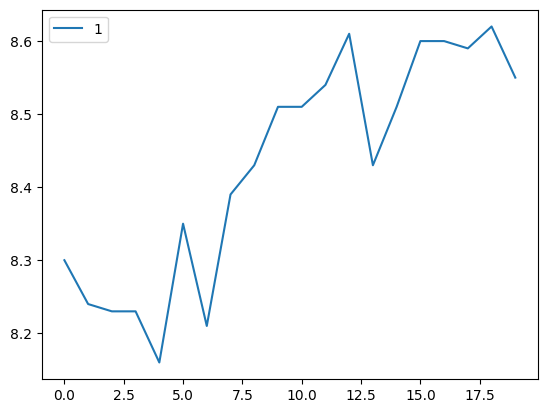

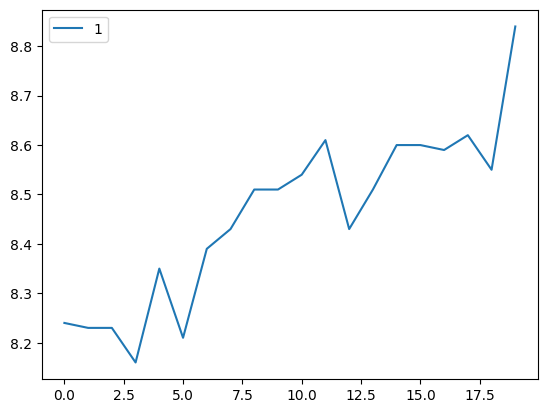

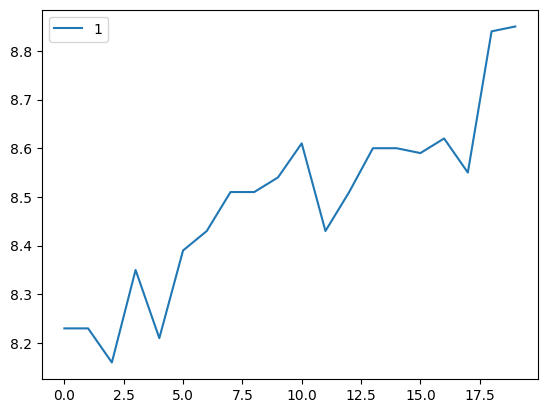

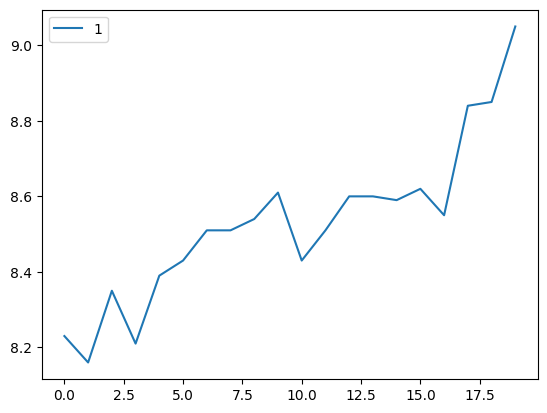

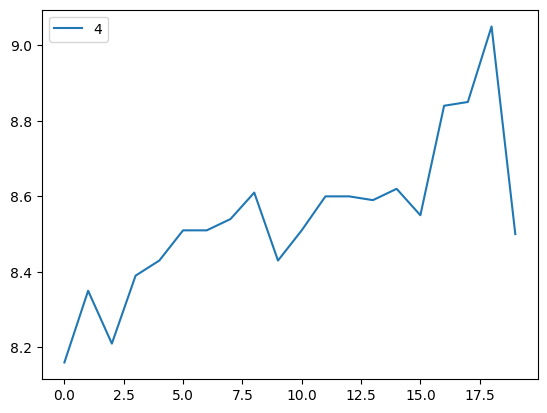

In [18]:
data_sliced_train = sliding_window_view(data_test, window_shape=20, axis = 0)

# for i in range(10, 20): 
i = 0
j = 0
while j < 10:
    if cluster_ids_x[i] != 3:
        plt.plot(data_sliced_train[i,0,:])
        plt.legend(f"{cluster_ids_x[i]}")
        plt.show()
        j += 1
    i += 1